###SVM Chi2

In [ ]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC                            # Support vector machine model
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

# Hyperparameter tuner and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('drive/MyDrive/Final_data_CKD_PP.csv')

In [ ]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0


In [ ]:
dataset = dataset[['age','bp','al','su','bgr','bu','sc','hemo','pcv','wc','htn','appet','pe','ane','classification']]  #chi2

In [ ]:
dataset

,age,bp,al,su,bgr,bu,sc,hemo,pcv,wc,htn,appet,pe,ane,classification
0,48,80,1,0,121,36.0,1.2,15.4,44,7800,1,0,0,0,0
1,7,50,4,0,121,18.0,0.8,11.3,38,6000,0,0,0,0,0
2,62,80,2,3,423,53.0,1.8,9.6,31,7500,0,1,0,1,0
3,48,70,4,0,117,56.0,3.8,11.2,32,6700,1,1,1,1,0
4,51,80,2,0,106,26.0,1.4,11.6,35,7300,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,0,0,140,49.0,0.5,15.7,47,6700,0,0,0,0,1
396,42,70,0,0,75,31.0,1.2,16.5,54,7800,0,0,0,0,1
397,12,80,0,0,100,26.0,0.6,15.8,49,6600,0,0,0,0,1
398,17,60,0,0,114,50.0,1.0,14.2,51,7200,0,0,0,0,1


In [ ]:
dataset.shape

(400, 15)

In [ ]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [ ]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[48., 80.,  1., ...,  0.,  0.,  0.],
       [ 7., 50.,  4., ...,  0.,  0.,  0.],
       [62., 80.,  2., ...,  1.,  0.,  1.],
       ...,
       [12., 80.,  0., ...,  0.,  0.,  0.],
       [17., 60.,  0., ...,  0.,  0.,  0.],
       [58., 80.,  0., ...,  0.,  0.,  0.]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(300, 14)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_test.shape

(100, 15)

In [ ]:
y_test.shape

(100,)

In [ ]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# # Reshaping X_train for efficient modelling
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = 2)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [ ]:
svm_grid_search(X_train, y_train)

{'kernel': 'rbf', 'gamma': 1, 'C': 100}

In [ ]:
import time

In [ ]:
from sklearn import svm
svm = SVC(gamma=1, C=100, kernel='poly', probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

1.0
0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.97      0.97      0.97        35

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
svm_tacc = svm.score(X_test, y_test)
svm_train_acc = svm.score(X_train, y_train)

###plot

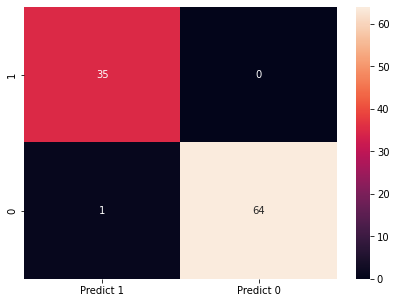

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(svm.history.history['loss'])
plt.plot(svm.history.history['val_loss'])
plt.title('SNSF-DT')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('SNSF-DT.png', dpi=100)

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
from google.colab import files
files.download('SNSF-DT.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.94      0.97      0.96        35

    accuracy                           0.97       100
   macro avg       0.96      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [ ]:
print(confusion_matrix(y_test,predictions))

[[63  2]
 [ 1 34]]


In [ ]:
cnf_matrix = [[63, 2],[1, 34]]

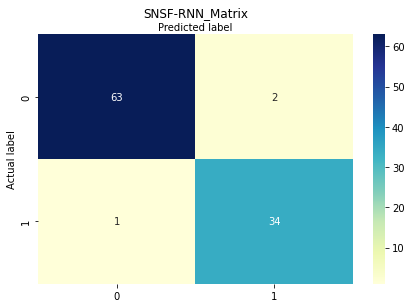

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('SNSF-DT_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('SNSF-DT_Matrix.png')
plt.show()

In [ ]:
from google.colab import files
files.download('SNSF-DT_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 